# Optimization and Deep Learning

## Goal of Optimization

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [ ]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [ ]:
def f_func(x):  # Renamed to avoid overwriting with the tensor
    return x * torch.cos(np.pi * x)

def g(x):
    return f_func(x) + 0.2 * torch.cos(5 * np.pi * x)

x = torch.arange(0.5, 1.5, 0.01, requires_grad=True)  # Set requires_grad=True
f = f_func(x)  # Use the function f_func
# Calculate the sum or mean of f before calling backward to get a scalar
f.sum().backward() # or f.mean().backward() sẽ cộng tất cả các phần tử của tensor b lại thành một giá trị duy nhất, từ đó cho phép hàm backward() thực hiện lan truyền ngược gradient qua toàn bộ đồ thị tính toán.
print(f"Shape of x: {x}")
print(f"Shape of f: {f}")
print(f"Gradient of f(x) = {x.grad}")

Shape of x: tensor([0.5000, 0.5100, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600, 0.5700, 0.5800,
        0.5900, 0.6000, 0.6100, 0.6200, 0.6300, 0.6400, 0.6500, 0.6600, 0.6700,
        0.6800, 0.6900, 0.7000, 0.7100, 0.7200, 0.7300, 0.7400, 0.7500, 0.7600,
        0.7700, 0.7800, 0.7900, 0.8000, 0.8100, 0.8200, 0.8300, 0.8400, 0.8500,
        0.8600, 0.8700, 0.8800, 0.8900, 0.9000, 0.9100, 0.9200, 0.9300, 0.9400,
        0.9500, 0.9600, 0.9700, 0.9800, 0.9900, 1.0000, 1.0100, 1.0200, 1.0300,
        1.0400, 1.0500, 1.0600, 1.0700, 1.0800, 1.0900, 1.1000, 1.1100, 1.1200,
        1.1300, 1.1400, 1.1500, 1.1600, 1.1700, 1.1800, 1.1900, 1.2000, 1.2100,
        1.2200, 1.2300, 1.2400, 1.2500, 1.2600, 1.2700, 1.2800, 1.2900, 1.3000,
        1.3100, 1.3200, 1.3300, 1.3400, 1.3500, 1.3600, 1.3700, 1.3800, 1.3900,
        1.4000, 1.4100, 1.4200, 1.4300, 1.4400, 1.4500, 1.4600, 1.4700, 1.4800,
        1.4900], requires_grad=True)
Shape of f: tensor([-2.1856e-08, -1.6020e-02, -3.2651e-02, -4.9877e-02,

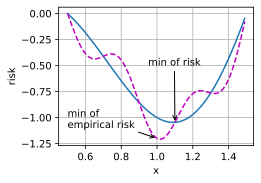

In [ ]:
def annotate(text, xy, xytext):
    plt.gca().annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [ ]:
a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True) # (Giống như hầu hết các hàm tạo tensor, torch.linspace() chấp nhận tùy chọn require_grad tùy chọn.) Đặt cờ này có nghĩa là trong mọi phép tính tiếp theo, autograd sẽ tích lũy lịch sử tính toán trong tensor đầu ra của phép tính đó
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


In [ ]:
b = torch.sin(a)
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

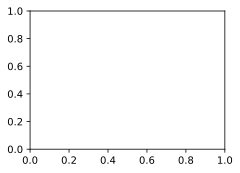

In [ ]:
plt.plot(a,b)
plt.show()

In [ ]:
print(b.detach()) # covert torch

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07])


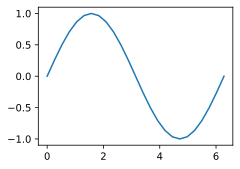

In [ ]:
plt.plot(a.detach(),b.detach())
plt.show()

In [ ]:
def f_func(x):  # Renamed to avoid overwriting with the tensor
    return x * torch.cos(np.pi * x)

def g(x):
    return f_func(x) + 0.2 * torch.cos(5 * np.pi * x)

x = torch.arange(0.5, 1.5, 0.01, requires_grad=True)  # Set requires_grad=True
f = f_func(x)  # Use the function f_func
# Calculate the sum or mean of f before calling backward to get a scalar
f.sum().backward() # or f.mean().backward() sẽ cộng tất cả các phần tử của tensor b lại thành một giá trị duy nhất, từ đó cho phép hàm backward() thực hiện lan truyền ngược gradient qua toàn bộ đồ thị tính toán.
print(f"Shape of x: {x}")
print(f"Shape of f: {f}")
print(f"Gradient of f(x) = {x.grad}")

Shape of x: tensor([0.5000, 0.5100, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600, 0.5700, 0.5800,
        0.5900, 0.6000, 0.6100, 0.6200, 0.6300, 0.6400, 0.6500, 0.6600, 0.6700,
        0.6800, 0.6900, 0.7000, 0.7100, 0.7200, 0.7300, 0.7400, 0.7500, 0.7600,
        0.7700, 0.7800, 0.7900, 0.8000, 0.8100, 0.8200, 0.8300, 0.8400, 0.8500,
        0.8600, 0.8700, 0.8800, 0.8900, 0.9000, 0.9100, 0.9200, 0.9300, 0.9400,
        0.9500, 0.9600, 0.9700, 0.9800, 0.9900, 1.0000, 1.0100, 1.0200, 1.0300,
        1.0400, 1.0500, 1.0600, 1.0700, 1.0800, 1.0900, 1.1000, 1.1100, 1.1200,
        1.1300, 1.1400, 1.1500, 1.1600, 1.1700, 1.1800, 1.1900, 1.2000, 1.2100,
        1.2200, 1.2300, 1.2400, 1.2500, 1.2600, 1.2700, 1.2800, 1.2900, 1.3000,
        1.3100, 1.3200, 1.3300, 1.3400, 1.3500, 1.3600, 1.3700, 1.3800, 1.3900,
        1.4000, 1.4100, 1.4200, 1.4300, 1.4400, 1.4500, 1.4600, 1.4700, 1.4800,
        1.4900], requires_grad=True)
Shape of f: tensor([-2.1856e-08, -1.6020e-02, -3.2651e-02, -4.9877e-02,

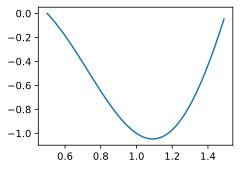

In [ ]:
plt.plot(x.detach(),f.detach())

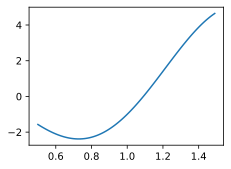

In [ ]:
plt.plot(x.detach(),x.grad.detach())

## Local Minima

Visualization

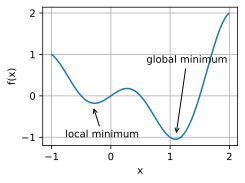

In [ ]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f_func(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

Giải pháp

Khởi tạo đầu parameter tốt

Sử dụng các phương pháp tối ưu linh hoạt như adam, ....

Tóm tắt nội dung:

Hàm mục tiêu của các mô hình deep learning thường có nhiều điểm cực tiểu cục bộ. Khi lời giải số của bài toán tối ưu tiến gần đến một cực tiểu cục bộ, kết quả thu được sau các vòng lặp có thể chỉ tối ưu hóa hàm mục tiêu ở mức độ cục bộ chứ không phải toàn cục, do gradient của lời giải tiến gần hoặc bằng 0. Một số mức độ nhiễu có thể giúp đẩy tham số ra khỏi cực tiểu cục bộ. Thực tế, đây là một trong những lợi ích của thuật toán **minibatch stochastic gradient descent**, trong đó sự biến thiên tự nhiên của gradient trên các minibatch có khả năng làm cho tham số thoát khỏi các điểm cực tiểu cục bộ.

##  Saddle Points

Visualization

Cú pháp
torch.arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor

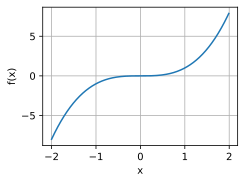

In [ ]:
x = torch.arange(-2, 2, 0.01)
d2l.plot(x,[x**3], 'x', 'f(x)')


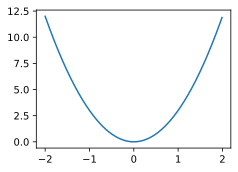

In [ ]:
x = torch.arange(-2., 2.,0.01, requires_grad=True)
y = x**3
y.sum().backward()
plt.plot(x.detach(), x.grad.detach())

Solution

Trong các bài toán nhiều chiều, ma trận **Hessian** của một hàm có thể có các giá trị riêng âm, dương hoặc cả hai tại các vị trí có gradient bằng 0. Điều này dẫn đến khả năng cao xuất hiện điểm yên ngựa trong không gian hàm hơn so với cực tiểu cục bộ. Các hàm lồi có giá trị riêng của ma trận Hessian luôn dương, tuy nhiên hầu hết các bài toán deep learning không thuộc loại này, dù tính lồi vẫn là công cụ quan trọng trong nghiên cứu tối ưu hóa

## Vanishing Gradients

Visualization

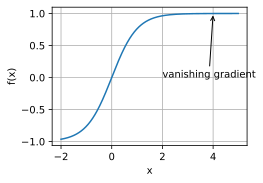

In [ ]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

Solution

refer : https://medium.com/@amanatulla1606/vanishing-gradient-problem-in-deep-learning-understanding-intuition-and-solutions-da90ef4ecb54

1. sử dụng activation như relu, và Leaky ReLU
2. Batch Normalization
3. khởi tạo trọng số (Xavier and He initialization)
4. và ResNets

trong việc giảm thiểu vấn đề gradient vashing



# Convexity

Dưới đây là bản dịch của các phần trong hình ảnh:

 **12.2.3 Ràng buộc (Hạn chế)**

Một trong những đặc tính hay của tối ưu hóa lồi là nó cho phép chúng ta xử lý các ràng buộc một cách hiệu quả. Nghĩa là, nó cho phép chúng ta giải quyết các vấn đề tối ưu hóa có ràng buộc có dạng:
\[
\minimize_{\mathbf{x}} f(\mathbf{x})
\]
với điều kiện \( c_i(\mathbf{x}) \leq 0 \) cho mọi \( i \in \{1, 2, \dots, n\} \),
trong đó \( f \) là hàm mục tiêu và các hàm \( c_i \) là các hàm ràng buộc. Để hiểu rõ hơn, xét trường hợp khi \( c_1(\mathbf{x}) = \|\mathbf{x}\|_2 - 1 \). Trong trường hợp này, các tham số \( \mathbf{x} \) bị giới hạn bên trong quả cầu có bán kính 1. Nếu ràng buộc thứ hai là \( c_2(\mathbf{x}) = \mathbf{v}^T \mathbf{x} + b \), thì điều này tương ứng với việc tất cả \( \mathbf{x} \) nằm trên một nửa không gian. Thỏa mãn cả hai ràng buộc cùng một lúc tương đương với việc chọn một phần của quả cầu.

 **12.2.3.1 Lagrangian (Lagrange)**

Nhìn chung, việc giải quyết vấn đề tối ưu hóa có ràng buộc là khó khăn. Một cách tiếp cận đến từ vật lý với trực giác khá đơn giản. Hãy tưởng tượng một quả bóng bên trong một cái hộp. Quả bóng sẽ lăn đến nơi thấp nhất và các lực của trọng lực sẽ cân bằng với các lực mà các thành bên của hộp tác dụng lên quả bóng. Nói ngắn gọn, gradient của hàm mục tiêu (tức là trọng lực) sẽ bị cân bằng bởi gradient của hàm ràng buộc (quả bóng phải ở lại bên trong hộp nhờ vào các bức tường "đẩy lại"). Lưu ý rằng một số ràng buộc có thể không hoạt động: các bức tường không chạm vào bóng sẽ không tác động lực lên nó.

Bỏ qua phần dẫn xuất của Lagrangian \( L \), lập luận trên có thể được biểu diễn dưới dạng bài toán tối ưu hóa điểm yên ngựa sau đây:
\[
L(\mathbf{x}, \alpha_1, \dots, \alpha_n) = f(\mathbf{x}) + \sum_{i=1}^{n} \alpha_i c_i(\mathbf{x}) \quad \text{với} \quad \alpha_i \geq 0.
\]
Ở đây các biến \( \alpha_i \) (với \( i = 1, 2, \dots, n \)) là các nhân tử Lagrange đảm bảo rằng các ràng buộc được thực thi chặt chẽ. Chúng được chọn sao cho đủ lớn để đảm bảo rằng \( c_i(\mathbf{x}) \leq 0 \) cho tất cả \( i \). Chẳng hạn, với bất kỳ \( \mathbf{x} \) nào mà \( c_i(\mathbf{x}) < 0 \) một cách tự nhiên, chúng ta sẽ chọn \( \alpha_i = 0 \). Hơn nữa, đây là một bài toán tối ưu hóa điểm yên ngựa, nơi chúng ta muốn cực đại hóa \( L \) đối với tất cả \( \alpha_i \) và đồng thời cực tiểu hóa nó đối với \( \mathbf{x} \).

**12.2.3.2 Phạt**

Một cách khác để thỏa mãn các vấn đề tối ưu hóa có ràng buộc ít nhất là xấp xỉ là điều chỉnh Lagrangian \( L \). Thay vì yêu cầu \( c_i(\mathbf{x}) \leq 0 \), chúng ta chỉ cần thêm \( \alpha_i c_i(\mathbf{x}) \) vào hàm mục tiêu \( f(\mathbf{x}) \). Điều này đảm bảo rằng các ràng buộc sẽ không bị vi phạm quá mức.

Thực tế, chúng ta đã sử dụng thủ thuật này khá lâu. Xét sự suy giảm trọng số được trình bày trong **Section 3.7**. Trong đó, chúng ta thêm \( \lambda \|\mathbf{w}\|^2 \) vào hàm mục tiêu để đảm bảo rằng \( \mathbf{w} \) không phát triển quá lớn. Từ bài toán tối ưu hóa có điểm yên ngựa, ta có thể thấy rằng điều này sẽ đảm bảo \( \|\mathbf{w}\|^2 \leq r^2 \) cho một giá trị \( r \) nào đó. Việc điều chỉnh \( \lambda \) cho phép chúng ta thay đổi kích thước của \( \mathbf{w} \).

Nhìn chung, việc thêm các điều khoản phạt là một cách tốt để đảm bảo rằng các ràng buộc được thỏa mãn gần đúng. Trong thực tế, phương pháp này mạnh mẽ hơn nhiều so với việc tìm kiếm sự thỏa mãn chính xác.

xem thêm https://www.tomciheng.com/article/Convexity